In [331]:
using DiffEqFlux,OrdinaryDiffEq,Flux,Optim,Plots,DifferentialEquations,CSV,DataFrames
using ForwardDiff

In [342]:
begin
    data=CSV.read("w2021-1.csv",DataFrame,header=6)
    dataset=Array(transpose(Matrix{Float32}(data[1:365,[8,5]])))
    dataset0=Matrix{Float32}(data[1:365,[8,5]])
    u0=Float32[-1.3,10.5]
    tspan=(Float32(0.0),Float32(364.0))
 end

(0.0f0, 364.0f0)

In [333]:
data_0=CSV.read("w2022.csv",DataFrame,header=6)
dataset_0=Matrix{Float32}(data_0[1:354,[4,6]])
dataset_1=Array(transpose(Matrix{Float32}(data_0[1:354,[4,6]])))

2×354 Matrix{Float32}:
  7.8  7.9  10.5  12.4  8.7   2.6  …  12.4  14.1  10.1  11.3  10.1  10.9
 -1.0  0.4   0.5   0.6  0.6  -1.7      3.0   2.3   4.5   2.8   0.0   0.8

In [334]:
model=Chain(LSTM(2 => 10), Dense(10 => 2))
function loss(x)
    l=sum(abs2,model(x)[1:364].-dataset[2:365])
end
opt=Adam(0.01)

Adam(0.01, (0.9, 0.999), 1.0e-8, IdDict{Any, Any}())

In [ ]:
loss(x, y) = Flux.Losses.mse(model(x), y)

loss (generic function with 2 methods)

In [ ]:
#xseq = Flux.unstack(dataset, 1) # Should translate x to an 7354 long array of 34x1 arrays


In [335]:
for i in 1:2000
    Flux.train!(loss,Flux.params(model) , [dataset,dataset], opt)
end

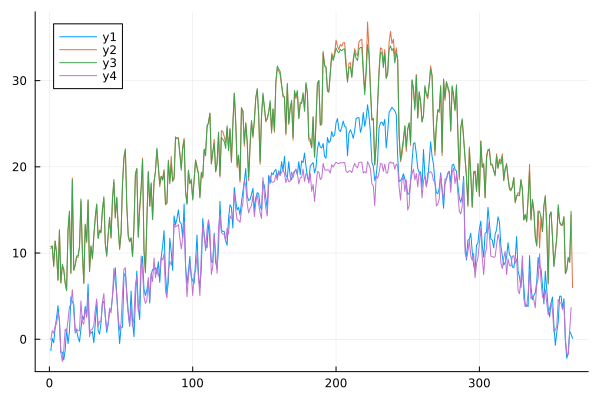

In [336]:
plot(transpose(dataset))
plot!(transpose(model(dataset))[1:364,1])
plot!(transpose(model(dataset))[1:364,2])

In [345]:
prob_neuralode = NeuralODE(model, tspan, saveat = 1)
function loss_neuralode(p)
    pred = Array(prob_neuralode(u0,p))
    loss = sum(abs2, dataset .- pred)
    return loss, pred
end

loss_neuralode (generic function with 1 method)

In [346]:
loss_neuralode(prob_neuralode.p)

(6.626308f12, [-1.3 0.1 … 0.6 0.1; 10.5 10.8 … 14.5 6.0;;; 5.097756 11.734503 … 16.839298 5.675418; 8.100044 13.258623 … 19.52027 6.9152713;;; 6.919976 23.986616 … 34.220615 13.340385; 4.5313635 17.629967 … 26.793156 9.887755;;; … ;;; 5508.4478 7631.1997 … 7640.9497 7936.6978; 1962.2821 4171.2534 … 4179.0615 4421.838;;; 5520.6055 7652.422 … 7662.1343 7958.805; 1963.1755 4182.8623 … 4190.6396 4434.164;;; 5536.703 7673.645 … 7683.3193 7980.913; 1968.5717 4194.4717 … 4202.2183 4446.491])

In [347]:
p1=prob_neuralode(dataset,prob_neuralode.p)

retcode: Success
Interpolation: 1st order linear
t: 365-element Vector{Float32}:
   0.0
   1.0
   2.0
   3.0
   4.0
   5.0
   6.0
   7.0
   8.0
   9.0
  10.0
  11.0
  12.0
   ⋮
 353.0
 354.0
 355.0
 356.0
 357.0
 358.0
 359.0
 360.0
 361.0
 362.0
 363.0
 364.0
u: 365-element Vector{Matrix{Float32}}:
 [-1.3 0.1 … 0.6 0.1; 10.5 10.8 … 14.5 6.0]
 [5.097756 11.734503 … 16.839298 5.675418; 8.100044 13.258623 … 19.52027 6.9152713]
 [6.919976 23.986616 … 34.220615 13.340385; 4.5313635 17.629967 … 26.793156 9.887755]
 [8.072922 35.904373 … 50.585022 22.884268; 1.1354078 22.178267 … 34.10284 13.42272]
 [8.021405 48.776962 … 67.62368 34.66798; -2.2774973 27.253927 … 42.139156 18.309053]
 [7.7520814 63.326954 … 85.75361 50.166637; -5.8344507 33.482613 … 51.34077 25.729202]
 [8.495131 80.474236 … 104.42378 69.503845; -8.274428 41.880848 … 61.026978 35.954372]
 [11.742006 99.53398 … 123.62622 90.210945; -7.3003287 51.852478 … 71.11823 47.22719]
 [15.17224 119.6161 … 143.43839 111.541214; -5.2891674

In [ ]:
loss_score(x, y) = Flux.Losses.mse(x, y)

loss_score (generic function with 1 method)

In [ ]:
loss_score(dataset_1[1,:],p1[1][1,1:354])

87.3335f0

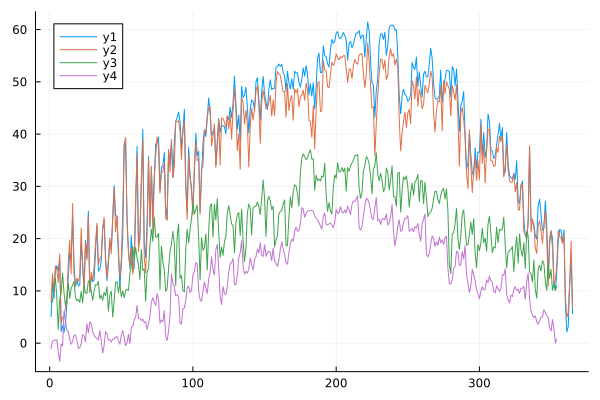

In [350]:
plot(transpose(p1[2]))
plot!(dataset_0)

In [ ]:
Float64(loss_score(p1[2][:,1:354],dataset_1))

532.0827026367188

In [ ]:
dudt2=Chain(LSTM(2 => 10), Dense(10 => 2))

In [ ]:
res=DiffEqFlux.sciml_train(loss_neuralode, prob_neuralode.p,
                                          ADAM(0.05),
                                          maxiters = 300)

In [351]:
dudt2=Chain(LSTM(2 => 10), Dense(10 => 2))
tspan = (Float32(0.0),Float32(364))
prob_neuralode = NeuralODE(dudt2, tspan, saveat = 1)
function loss_neuralode(p)
    pred = Array(prob_neuralode(u0,p))
    loss = sum(abs2, dataset .- pred)
    return loss, pred
end

loss_neuralode (generic function with 1 method)

In [352]:
res=DiffEqFlux.sciml_train(loss_neuralode, prob_neuralode.p,
                                          ADAM(0.05),
                                          maxiters = 300)

┌ Warning: sciml_train is being deprecated in favor of direct usage of Optimization.jl. Please consult the Optimization.jl documentation for more details. Optimization.jl's PolyOpt solver is the polyalgorithm of sciml_train
└ @ DiffEqFlux /Users/aaaa/.julia/packages/DiffEqFlux/2IJEZ/src/train.jl:6


u: 562-element Vector{Float32}:
  0.04981349
 -0.093123205
  0.1178016
  0.258495
  0.48283127
  0.4890584
 -0.17769906
 -0.5685537
 -0.24171361
 -0.08263089
  0.048136875
  0.21994974
  0.35614666
  ⋮
 -0.03000687
 -0.79789037
 -0.62279
  0.2142802
  0.48939052
 -1.0808122
  1.0766279
  0.18184051
 -0.2099612
  0.11529838
 -0.36239365
  0.17281595

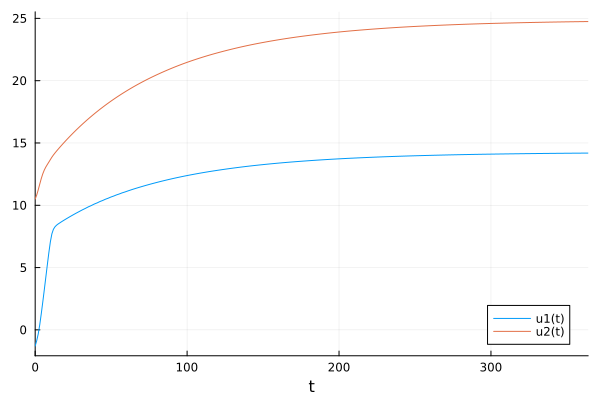

In [353]:
plot(prob_neuralode(u0,res))

In [196]:
dudt2 = Chain(LSTM(2 => 10), Dense(10 => 2))
p,re = Flux.destructure(dudt2) # use this p as the initial condition!
dudt(u,p,t) = re(p)(u) # need to restrcture for backprop!
prob = ODEProblem(dudt,u0,tspan)

ODEProblem with uType Vector{Float32} and tType Float32. In-place: false
timespan: (0.0f0, 364.0f0)
u0: 2-element Vector{Float32}:
 -1.3
 10.5

In [197]:
sol=solve(prob,p=p,saveat=1)

retcode: Success
Interpolation: 1st order linear
t: 365-element Vector{Float32}:
   0.0
   1.0
   2.0
   3.0
   4.0
   5.0
   6.0
   7.0
   8.0
   9.0
  10.0
  11.0
  12.0
   ⋮
 353.0
 354.0
 355.0
 356.0
 357.0
 358.0
 359.0
 360.0
 361.0
 362.0
 363.0
 364.0
u: 365-element Vector{Vector{Float32}}:
 [-1.3, 10.5]
 [-1.4753892, 10.100637]
 [-1.6384516, 9.710796]
 [-1.7883973, 9.33248]
 [-1.9245483, 8.9674635]
 [-2.046383, 8.617196]
 [-2.153593, 8.282707]
 [-2.2461133, 7.964586]
 [-2.324113, 7.662986]
 [-2.3880112, 7.377634]
 [-2.4384003, 7.107947]
 [-2.475966, 6.853152]
 [-2.501488, 6.612277]
 ⋮
 [4.2515578f-9, 8.994875f-9]
 [4.6326964f-9, 8.127233f-9]
 [4.9404276f-9, 7.3053563f-9]
 [5.1840967f-9, 6.5311268f-9]
 [5.371155f-9, 5.805191f-9]
 [5.5070704f-9, 5.1276574f-9]
 [5.5953606f-9, 4.49774f-9]
 [5.6376726f-9, 3.913309f-9]
 [5.633595f-9, 3.372179f-9]
 [5.580879f-9, 2.8705003f-9]
 [5.475215f-9, 2.404282f-9]
 [5.310498f-9, 1.9678899f-9]

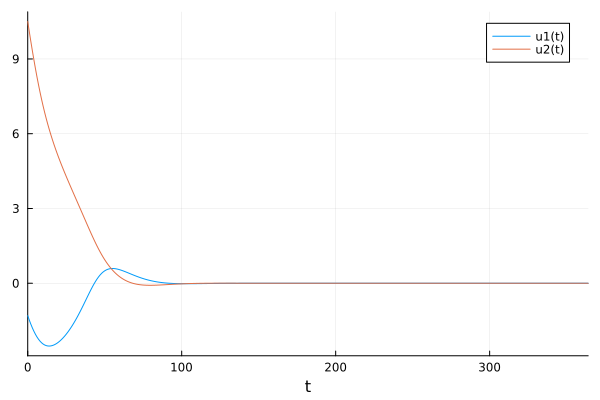

In [198]:
plot(sol)

In [229]:
sol1=solve(prob,p=Flux.params(u0,p)[2],saveat=1)

retcode: Success
Interpolation: 1st order linear
t: 365-element Vector{Float32}:
   0.0
   1.0
   2.0
   3.0
   4.0
   5.0
   6.0
   7.0
   8.0
   9.0
  10.0
  11.0
  12.0
   ⋮
 353.0
 354.0
 355.0
 356.0
 357.0
 358.0
 359.0
 360.0
 361.0
 362.0
 363.0
 364.0
u: 365-element Vector{Vector{Float32}}:
 [-2.5181227, 6.541571]
 [-1.8413926, 6.4087973]
 [-1.1289437, 6.238165]
 [-0.41131997, 6.0403724]
 [0.2663465, 5.83826]
 [0.84826183, 5.673771]
 [1.2884396, 5.5924025]
 [1.5924563, 5.6024065]
 [1.8025869, 5.679167]
 [1.9639064, 5.7922325]
 [2.1012344, 5.924274]
 [2.2275488, 6.0661697]
 [2.3495169, 6.213236]
 ⋮
 [15.657407, 24.574663]
 [15.65745, 24.574724]
 [15.657492, 24.574783]
 [15.657532, 24.57484]
 [15.657571, 24.574896]
 [15.657609, 24.574947]
 [15.657646, 24.574999]
 [15.657682, 24.575048]
 [15.657717, 24.575094]
 [15.65775, 24.57514]
 [15.657783, 24.575182]
 [15.657814, 24.575222]

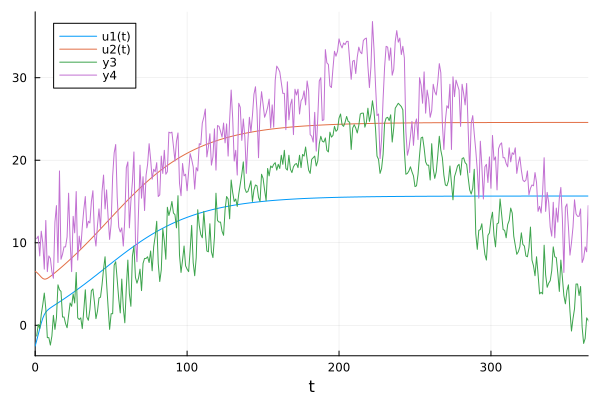

In [310]:
plot(sol1)
plot!(dataset0)

In [199]:
function predict_n_ode()
  Array(solve(prob,u0=u0,p=p,saveat=1))
end

function loss_n_ode()
    pred = predict_n_ode()
    loss = sum(abs2,dataset .- pred)
    loss
end


loss_n_ode (generic function with 2 methods)

In [216]:
Flux.params(u0,p) 

Params([Float32[-1.3, 10.5], Float32[0.27228495, -0.35032648, -0.033286713, -0.3401751, 0.13094416, 0.16629425, 0.29887614, -0.23081803, 0.31572944, 0.28565407  …  0.6060848, 0.39386246, -0.41716117, 0.29459947, -0.64034194, -0.26064023, -0.57466435, 0.6486862, 0.0, 0.0]])

In [228]:
for i in 1:1000
         Flux.train!(loss_n_ode,Flux.params(u0,p) , [dataset,dataset], opt)
end

In [ ]:
sol1=solve(prob,p=Flux.params(u0,p)[2],saveat=1)

In [ ]:
plot(sol1)
plot!(sol)